In [9]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df=pd.read_csv('cleaned_dataset.csv')

In [3]:
df.head()

,year,estimate,hispanic_latino_flag,hispanic_latino_race,white,native_black,black_american,american_indian,asian_pacific_islander,asian,...,age_25-34_years,age_35-44_years,age_45-54_years,age_55-64_years,age_65-74_years,age_75-84_years,age_85_years_and_over,age_under_15_years,gender_female,gender_male
0,1999,6.1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,6.2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,6.8,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2002,8.2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2003,8.9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(5117, 29)

In [5]:
df.describe()

,year,estimate,hispanic_latino_flag,hispanic_latino_race,white,native_black,black_american,american_indian,asian_pacific_islander,asian,...,age_25-34_years,age_35-44_years,age_45-54_years,age_55-64_years,age_65-74_years,age_75-84_years,age_85_years_and_over,age_under_15_years,gender_female,gender_male
count,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,...,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000
mean,2009.088919,4.743443,0.842877,0.048075,0.098495,0.048661,0.048661,0.069767,0.046512,0.024428,...,0.070354,0.070354,0.070354,0.068399,0.056478,0.035763,0.025796,0.030291,0.384405,0.394176
std,5.773726,6.424471,0.363953,0.213946,0.298012,0.215180,0.215180,0.254780,0.210611,0.154390,...,0.255767,0.255767,0.255767,0.252455,0.230866,0.185717,0.158543,0.171404,0.486502,0.488721
min,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,2.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2018.000000,54.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Create a box plot for sepal length by species and sepal width, color by species
fig = px.box(df, x='estimate', color='year', labels={'x': 'estimate', 'y': 'year'}, title='Distribution of Estimate by Year')
fig.update_layout(height=600, width=1200)
fig.show()

In [7]:
# Calculate the correlation matrix

df.corr().style.background_gradient(cmap='coolwarm', axis=None)

,year,estimate,hispanic_latino_flag,hispanic_latino_race,white,native_black,black_american,american_indian,asian_pacific_islander,asian,native_hawaiian,panel_any_opioid,panel_heroin,panel_methadone,panel_natural_opioids,panel_other_synthetic,unit_age_adjusted,unit_crude,age_15-24_years,age_25-34_years,age_35-44_years,age_45-54_years,age_55-64_years,age_65-74_years,age_75-84_years,age_85_years_and_over,age_under_15_years,gender_female,gender_male
year,1.000000,0.280952,-0.047022,0.003185,-0.007817,-0.000809,-0.000809,0.068333,0.066039,0.061811,0.021580,-0.014158,0.022446,-0.007317,0.013063,0.030246,0.050783,-0.050783,-0.022057,-0.028063,-0.028063,-0.028063,-0.018120,0.024533,0.012346,0.023972,0.011499,0.018865,0.011475
estimate,0.280952,1.000000,-0.021942,-0.077175,0.048505,-0.028564,-0.032580,0.080797,-0.124011,-0.088252,0.028199,0.119674,-0.154282,-0.218714,-0.154796,-0.154232,-0.046782,0.046782,-0.071265,0.116323,0.159278,0.165892,0.015739,-0.106873,-0.097009,-0.058768,-0.126940,-0.172103,0.169823
hispanic_latino_flag,-0.047022,-0.021942,1.000000,0.097028,-0.311429,-0.523825,0.097648,-0.254866,-0.200444,-0.366505,-0.032381,-0.005895,-0.002159,0.007092,-0.000624,0.011696,-0.494591,0.494591,0.117885,0.118774,0.118774,0.118774,0.116990,0.105634,0.083150,0.070257,0.076309,-0.087142,-0.108883
hispanic_latino_race,0.003185,-0.077175,0.097028,1.000000,-0.074282,-0.050826,-0.050826,-0.061544,-0.049634,-0.035561,-0.003142,-0.013679,0.021628,0.016370,-0.005303,0.004209,0.257434,-0.257434,-0.061359,-0.061822,-0.061822,-0.061822,-0.060893,-0.054982,-0.043280,-0.036569,-0.039719,0.051524,0.050535
white,-0.007817,0.048505,-0.311429,-0.074282,1.000000,-0.074756,-0.074756,-0.090522,-0.073004,-0.052305,-0.004621,-0.023512,0.027911,0.024077,-0.011298,0.021506,0.378644,-0.378644,-0.090249,-0.090930,-0.090930,-0.090930,-0.089564,-0.080870,-0.063657,-0.053787,-0.058420,0.078545,0.071579
native_black,-0.000809,-0.028564,-0.523825,-0.050826,-0.074756,1.000000,-0.051150,-0.061938,-0.049951,-0.035788,-0.003162,-0.014941,0.020416,0.017778,-0.006548,0.008244,0.259079,-0.259079,-0.061751,-0.062217,-0.062217,-0.062217,-0.061282,-0.055334,-0.043556,-0.036803,-0.039973,0.052809,0.049906
black_american,-0.000809,-0.032580,0.097648,-0.050826,-0.074756,-0.051150,1.000000,-0.061938,-0.049951,-0.035788,-0.003162,-0.014941,0.020416,0.017778,-0.006548,0.008244,0.259079,-0.259079,-0.061751,-0.062217,-0.062217,-0.062217,-0.061282,-0.055334,-0.043556,-0.036803,-0.039973,0.052809,0.049906
american_indian,0.068333,0.080797,-0.254866,-0.061544,-0.090522,-0.061938,-0.061938,1.000000,-0.060486,-0.043336,-0.003829,0.027971,-0.029210,-0.005378,0.011614,-0.035739,0.313717,-0.313717,-0.074774,-0.075338,-0.075338,-0.075338,-0.074207,-0.067003,-0.052742,-0.044564,-0.048403,0.054827,0.069509
asian_pacific_islander,0.066039,-0.124011,-0.200444,-0.049634,-0.073004,-0.049951,-0.049951,-0.060486,1.000000,0.662363,-0.003088,0.048330,-0.028946,-0.081598,0.017422,-0.048215,0.253006,-0.253006,-0.060304,-0.060759,-0.060759,-0.060759,-0.059846,-0.054037,-0.042535,-0.035940,-0.039036,0.020053,0.080112
asian,0.061811,-0.088252,-0.366505,-0.035561,-0.052305,-0.035788,-0.035788,-0.043336,0.662363,1.000000,-0.002212,0.034023,-0.022777,-0.060554,0.011623,-0.028785,0.181270,-0.181270,-0.043205,-0.043531,-0.043531,-0.043531,-0.042877,-0.038715,-0.030475,-0.025750,-0.027968,0.012880,0.058878


In [8]:
df.columns

Index(['year', 'estimate', 'hispanic_latino_flag', 'hispanic_latino_race',
       'white', 'native_black', 'black_american', 'american_indian',
       'asian_pacific_islander', 'asian', 'native_hawaiian',
       'panel_any_opioid', 'panel_heroin', 'panel_methadone',
       'panel_natural_opioids', 'panel_other_synthetic', 'unit_age_adjusted',
       'unit_crude', 'age_15-24_years', 'age_25-34_years', 'age_35-44_years',
       'age_45-54_years', 'age_55-64_years', 'age_65-74_years',
       'age_75-84_years', 'age_85_years_and_over', 'age_under_15_years',
       'gender_female', 'gender_male'],
      dtype='object')

In [10]:
# Select features for clustering (you can choose a subset of features based on your analysis goals)
features = ['hispanic_latino_flag', 'hispanic_latino_race',
       'white', 'native_black', 'black_american', 'american_indian',
       'asian_pacific_islander', 'asian', 'native_hawaiian',
       'panel_any_opioid', 'panel_heroin', 'panel_methadone',
       'panel_natural_opioids', 'panel_other_synthetic', 'unit_age_adjusted',
       'unit_crude', 'age_15-24_years', 'age_25-34_years', 'age_35-44_years',
       'age_45-54_years', 'age_55-64_years', 'age_65-74_years',
       'age_75-84_years', 'age_85_years_and_over', 'age_under_15_years',
       'gender_female', 'gender_male']  # Replace with your features

# Handle categorical variables using one-hot encoding
data_encoded = pd.get_dummies(df[features])

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Convert the scaled data back to a DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=data_encoded.columns)

In [21]:
# Set the number of clusters (you can use methods like the elbow method to determine the optimal number)
n_clusters = 3  # Adjust as needed

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data_scaled_df['Cluster'] = kmeans.fit_predict(data_scaled_df)

# Add the cluster labels back to the original data
df['Cluster'] = data_scaled_df['Cluster']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [22]:
# Group data by clusters and calculate summary statistics
cluster_summary = df.groupby('Cluster').agg({
    'estimate': ['mean', 'median', 'std'],
    # Add other summary statistics for other features as needed
})

print(cluster_summary)



         estimate                 
             mean median       std
Cluster                           
0        5.005785    2.2  7.043551
1        4.593056    2.2  5.587254
2        1.160800    0.8  1.032449


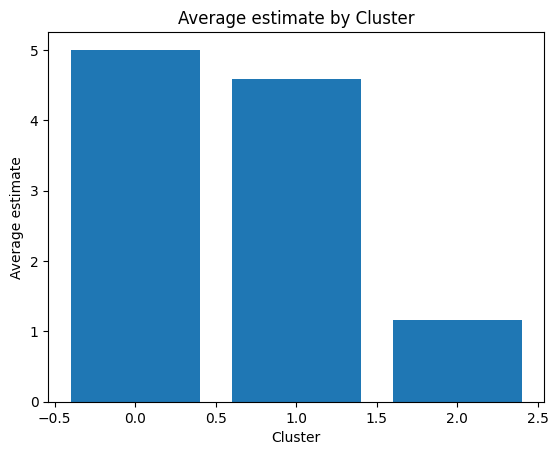

In [23]:
# Plot the average estimate for each cluster
cluster_avg_spend_index = df.groupby('Cluster')['estimate'].mean()
plt.bar(cluster_avg_spend_index.index, cluster_avg_spend_index)
plt.xlabel('Cluster')
plt.ylabel('Average estimate')
plt.title('Average estimate by Cluster')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

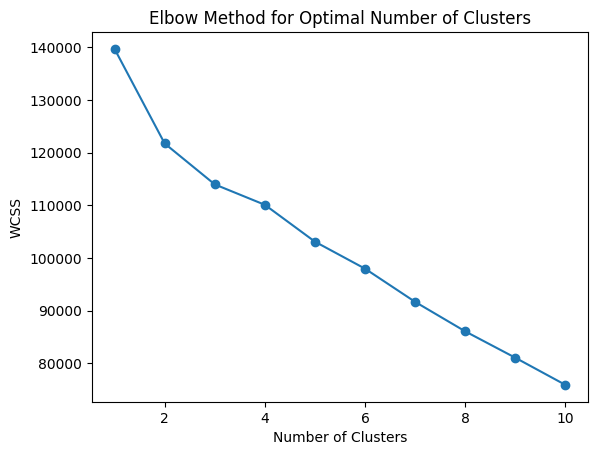

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for a range of cluster numbers
wcss = []
cluster_range = range(1, 11)  # Adjust the range as needed
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_df)  # Use your scaled data
    wcss.append(kmeans.inertia_)

# Plot the WCSS against the number of clusters
plt.plot(cluster_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [28]:
df.head()

,year,estimate,hispanic_latino_flag,hispanic_latino_race,white,native_black,black_american,american_indian,asian_pacific_islander,asian,...,age_35-44_years,age_45-54_years,age_55-64_years,age_65-74_years,age_75-84_years,age_85_years_and_over,age_under_15_years,gender_female,gender_male,Cluster
0,1999,6.1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2000,6.2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2001,6.8,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2002,8.2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2003,8.9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
df['Cluster'][''].value_counts()

Cluster
0    2904
1    2088
2     125
Name: count, dtype: int64

In [30]:
df.columns

Index(['year', 'estimate', 'hispanic_latino_flag', 'hispanic_latino_race',
       'white', 'native_black', 'black_american', 'american_indian',
       'asian_pacific_islander', 'asian', 'native_hawaiian',
       'panel_any_opioid', 'panel_heroin', 'panel_methadone',
       'panel_natural_opioids', 'panel_other_synthetic', 'unit_age_adjusted',
       'unit_crude', 'age_15-24_years', 'age_25-34_years', 'age_35-44_years',
       'age_45-54_years', 'age_55-64_years', 'age_65-74_years',
       'age_75-84_years', 'age_85_years_and_over', 'age_under_15_years',
       'gender_female', 'gender_male', 'Cluster'],
      dtype='object')

In [32]:
feature=df.columns
feature

Index(['year', 'estimate', 'hispanic_latino_flag', 'hispanic_latino_race',
       'white', 'native_black', 'black_american', 'american_indian',
       'asian_pacific_islander', 'asian', 'native_hawaiian',
       'panel_any_opioid', 'panel_heroin', 'panel_methadone',
       'panel_natural_opioids', 'panel_other_synthetic', 'unit_age_adjusted',
       'unit_crude', 'age_15-24_years', 'age_25-34_years', 'age_35-44_years',
       'age_45-54_years', 'age_55-64_years', 'age_65-74_years',
       'age_75-84_years', 'age_85_years_and_over', 'age_under_15_years',
       'gender_female', 'gender_male', 'Cluster'],
      dtype='object')

In [33]:
df.groupby("Cluster")[feature].sum()

,year,estimate,hispanic_latino_flag,hispanic_latino_race,white,native_black,black_american,american_indian,asian_pacific_islander,asian,...,age_35-44_years,age_45-54_years,age_55-64_years,age_65-74_years,age_75-84_years,age_85_years_and_over,age_under_15_years,gender_female,gender_male,Cluster
Cluster,,,,,,,,,,,,,,,,,,,,,
0,5833651,14536.8,2904,0,0,0,0,0,0,0,...,360,360,350,289,183,132,155,947,944,0
1,4195439,9590.3,1409,246,504,249,249,357,122,0,...,0,0,0,0,0,0,0,967,1001,2088
2,251418,145.1,0,0,0,0,0,0,116,125,...,0,0,0,0,0,0,0,53,72,250


In [34]:
import pandas as pd
from sklearn.cluster import KMeans
from google.colab import files

# Step 1: Install necessary library for writing Excel files
!pip install openpyxl

In [35]:
# Step 3: Export the DataFrame to an Excel file
output_file = 'clustering_results.xlsx'
df.to_excel(output_file, index=False)

# Step 4: Download the file from Google Colab
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>